# Football Expected Goals Project 

# Introduction

Statsbomb data represent shots data for different matches, teams and seasons the target is to 
identify what you think could be the best predictors for goals.




# Steps 

1-Data Exploring                                                                                                               
2-Data Cleaning data frame first (shots_df)                                                                                     
3-Data Cleaning data frame second (shots_freeze_frames_df)                                                                     
4-Data Modeling                                                                                                                 
5-Data Visualization

# Data Exploring


In [62]:
#First we have to loa the data and import the libabries that we may use 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib as matplotlib

In [63]:
#shots_df will be called shots and freeze_frames_df will be called freeze_frame
shots = pd.read_csv(r'C:\Users\FADIA\Desktop\task\shots_df.csv',encoding="ISO-8859-1")
freeze_frame = pd.read_csv(r'C:\Users\FADIA\Desktop\task\shots_freeze_frames_df.csv',encoding="ISO-8859-1")
#I was trying to know the total number of the raws in this set 
b=len(shots)
print('Total Number of Rows or Shots Dataset = ',b)

Total Number of Rows or Shots Dataset =  2816


In [64]:
#I want to know is the id in any of the tables is duplicate and i found in freez_frame id is duplicate while in shots its 
#unique
shots['id'].value_counts()
freeze_frame['id'].value_counts()

71a32aa1-eee0-491a-a9b2-01e44f39a57c    20
95b99916-9fa7-4aa9-8008-5dc06c3c29bd    20
39a8cf4f-c3d2-4e3c-9b6c-d8a6ff6eed35    20
de928495-637b-4a74-8f5a-f88a55974a2f    20
bb8134dd-7031-422c-a87f-399fedea9900    20
                                        ..
2c3745b5-945d-4358-af19-a2c02771ad0b     2
8a487f30-903e-4563-a881-941f3633fbe9     2
b79bc4f1-8df1-4aaa-9571-dc733265ac83     2
a63f551b-32ec-4e5a-8148-2a11eb278884     2
e4f890f4-13d3-4fcc-82bc-316e8634cce7     2
Name: id, Length: 2792, dtype: int64

# Data Cleaning for first data frame 


In [65]:
#I am trying to know if there is any nulls so i used isnull function 
shots_nulls=sum(shots.isnull().any())
freez_nulls=sum(freeze_frame.isnull().any())
print('shots_nulls =',shots_nulls,'freez_nulls',freez_nulls)

shots_nulls = 10 freez_nulls 0


In [66]:
#i decide to drop the nulls but first i'll replace the "nan word" into "false" so if i deleted the nulls it won't affect the other rows
shots.replace(np.nan,'False',inplace=True)
#Droping Nulls 
shots.dropna(inplace=True)
null_droped=sum(shots.isnull().any())
print('nulls count =',null_droped)
shots.tail()

nulls count = 0


,id,period,timestamp,minute,second,possession,duration,location,under_pressure,type.id,...,shot.open_goal,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,shot.end_location.x,shot.end_location.y,shot.end_location.z
2811,a42b9ce2-f07e-4573-9812-f2bb0d22679d,2,32:10.5,77,10,155,1.457700,"c(94.1, 47.2)",False,16,...,False,False,False,False,False,94.1,47.2,118.6,37.6,0.5
2812,06dc59cd-bc9e-4ade-8c39-06d141532b31,2,33:02.4,78,2,160,0.462900,"c(107.7, 49.6)",False,16,...,False,False,False,False,False,107.7,49.6,113.1,44.0,False
2813,66c83037-2341-44c5-8537-18739d1222a0,2,34:45.5,79,45,164,1.614835,"c(104, 51.6)",True,16,...,False,True,False,False,False,104.0,51.6,117.9,42.8,0.9
2814,8a59f800-19ab-4dc4-b0f1-4fbba16dad54,2,35:53.9,80,53,183,2.533402,"c(105.1, 59.6)",True,16,...,False,True,False,False,False,105.1,59.6,120.0,34.0,0.2
2815,61778764-2502-42cf-b714-b0ab3429874a,2,39:19.6,84,19,188,0.864600,"c(105.7, 27.8)",False,16,...,False,False,False,False,False,105.7,27.8,118.7,36.3,1.5


In [67]:
#making sure that there is no duplicates
sum(shots.duplicated())

0

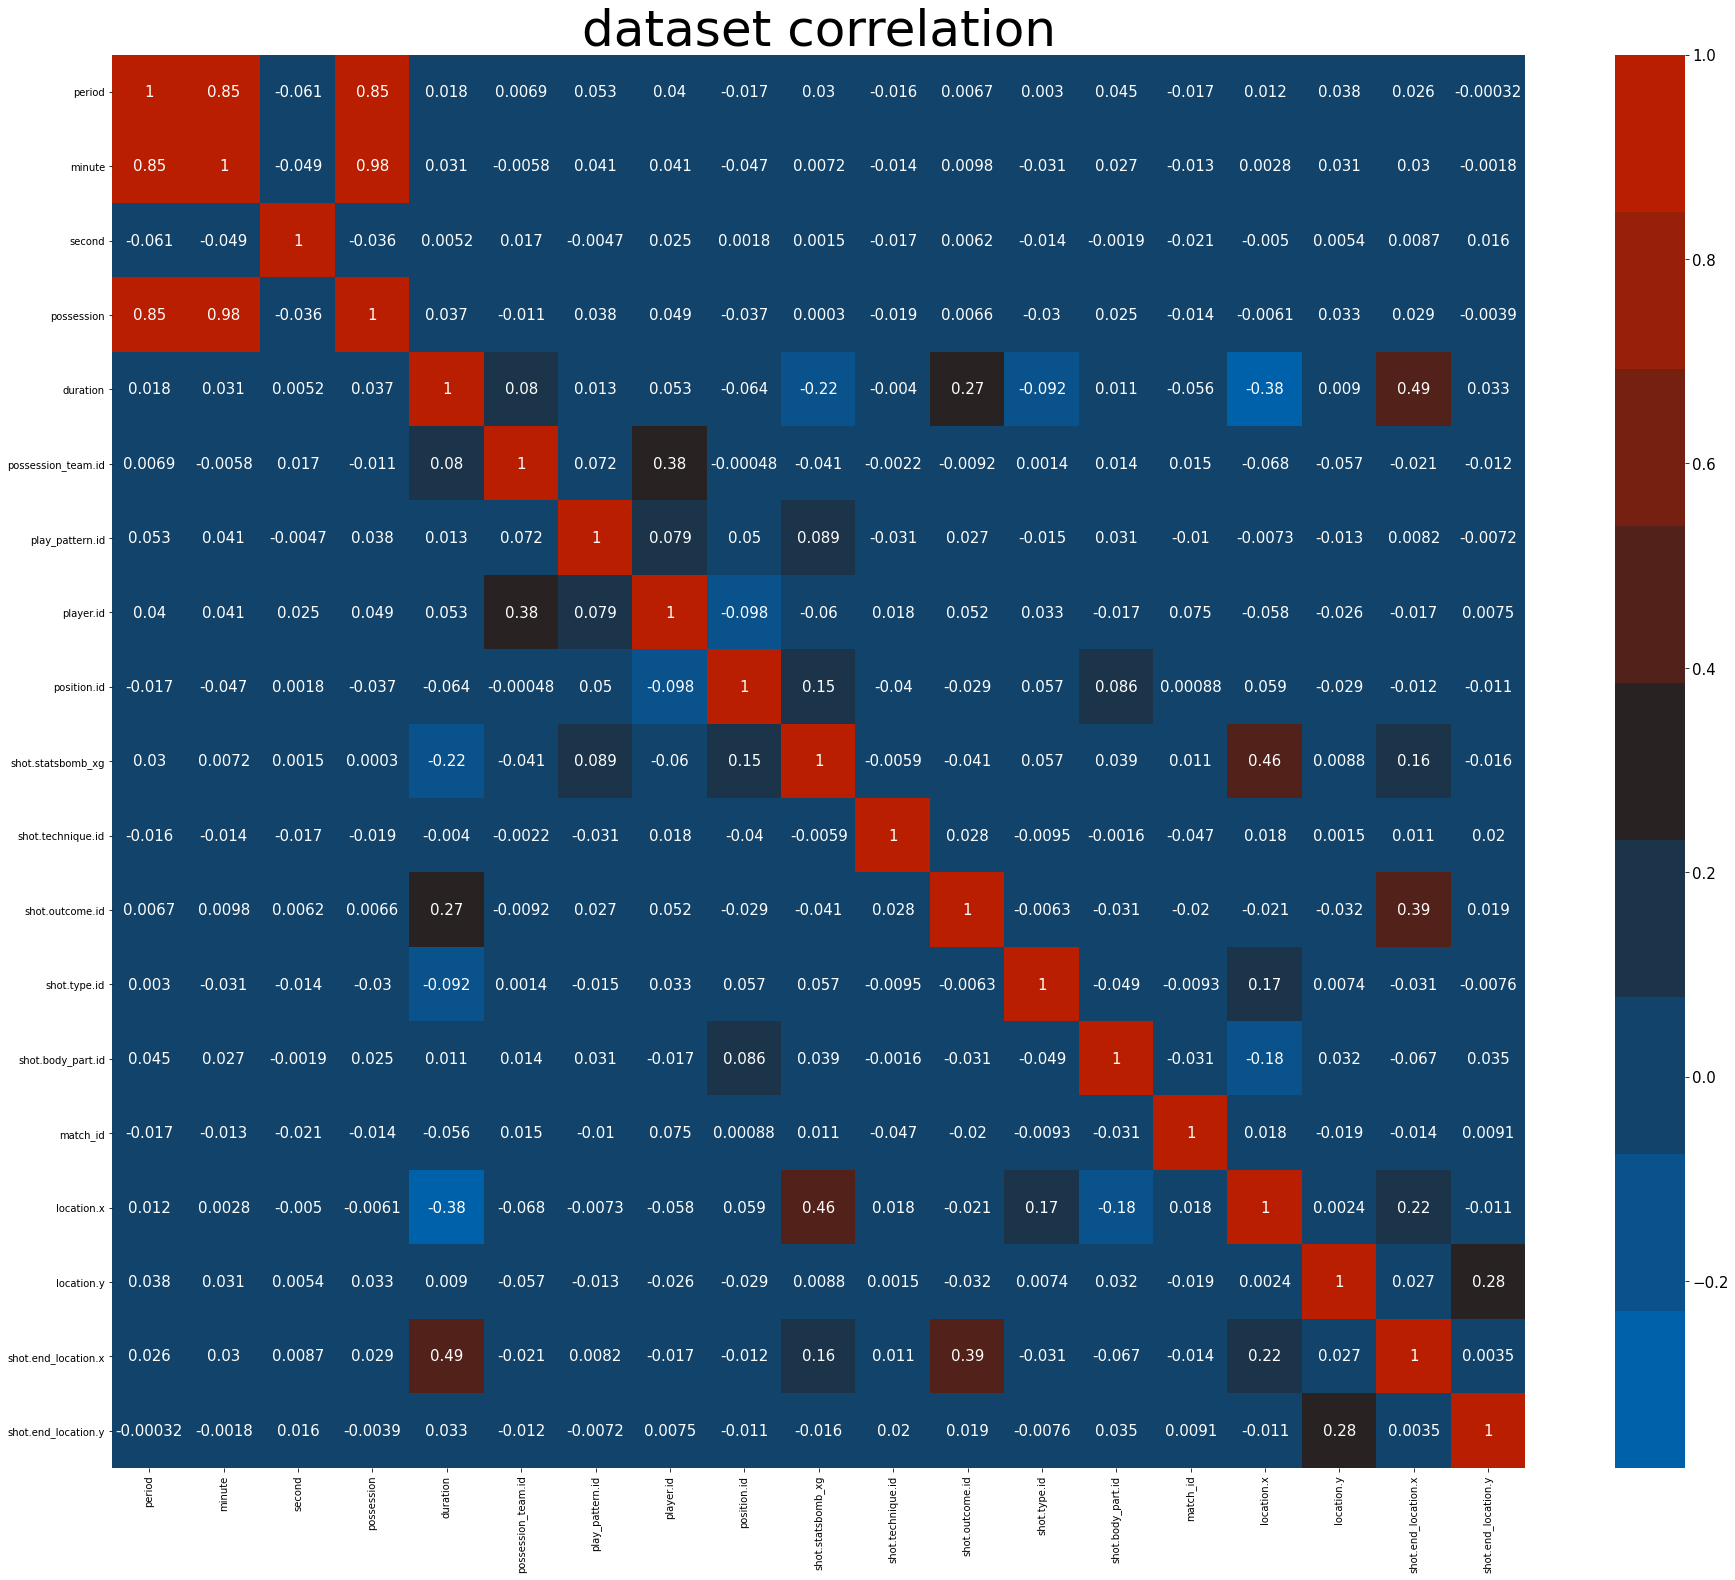

In [68]:
#this is just an explorartory visualization in order to understand the data more 
f, ax = plt.subplots(figsize=(32, 26))
corr = shots.drop(['type.id', 'team.id', 'competition_id', 'season_id'], axis=1).corr()
matplotlib.rcParams.update({'font.size': 15})
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 15, s=105, l=40, n=9, center="dark"), square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=50);

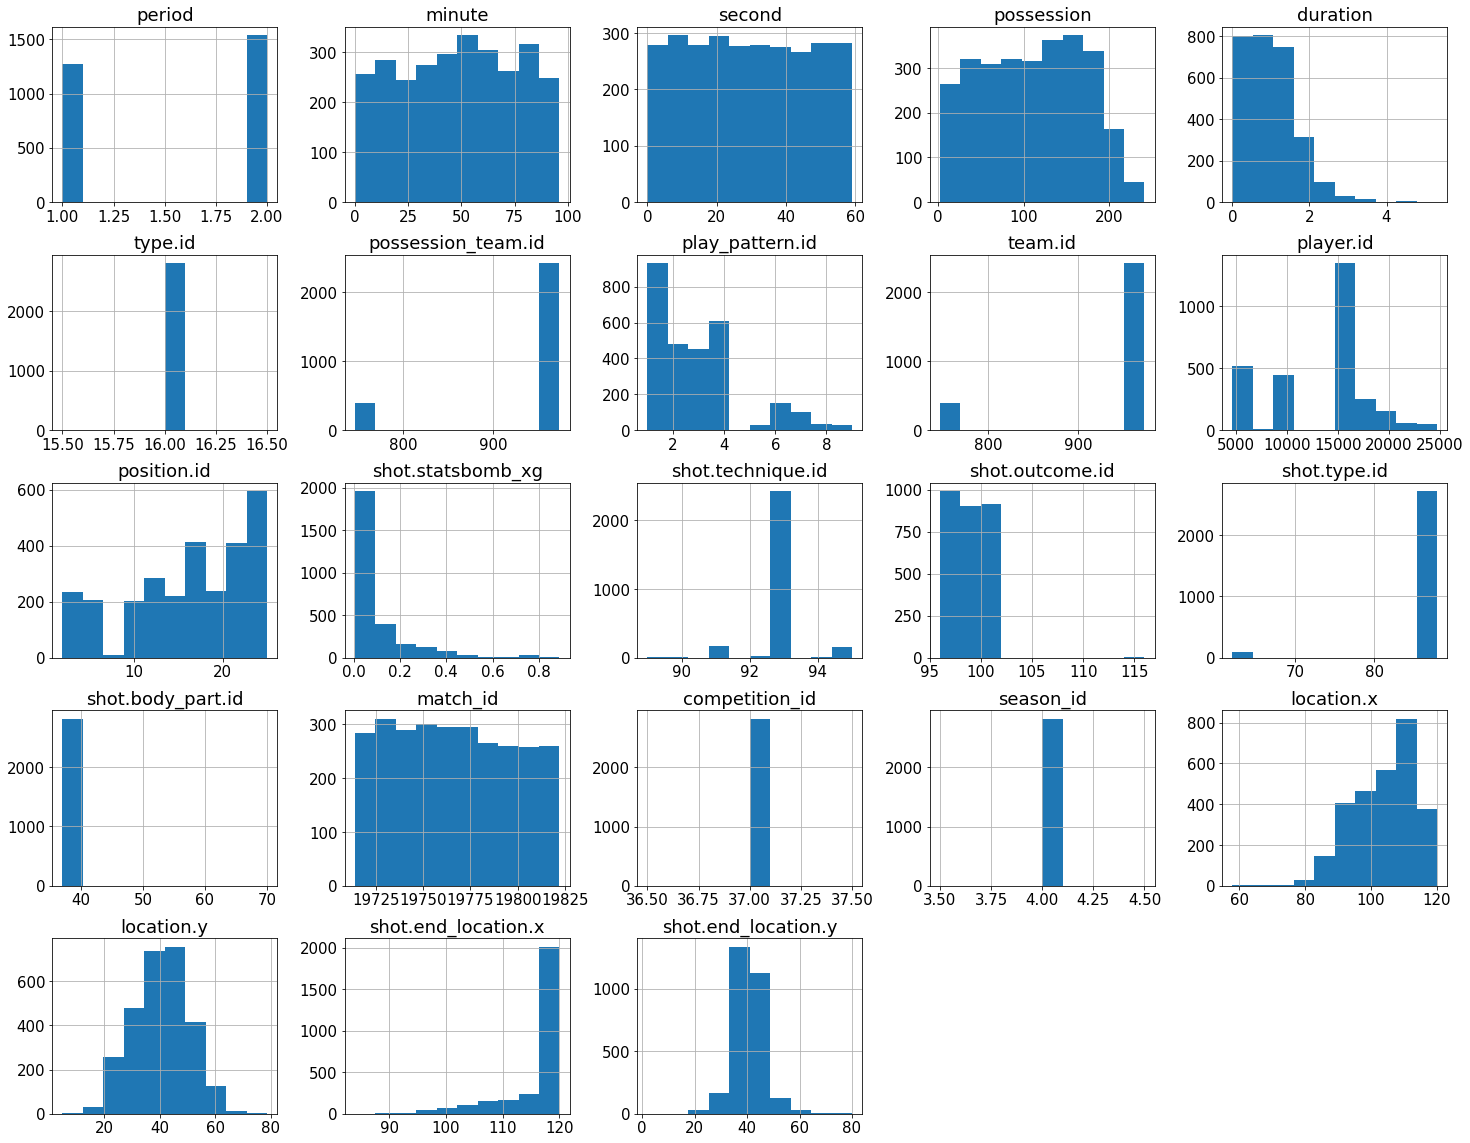

In [69]:
shots.hist(figsize=(25,20));

In [70]:
#i am creating a new df from the orginal one by removing the columns that i believe its useless for this phase like 
#statsbomb_xg,keypass_id, and the new set will be called shots modified abbriviated into shots_mod
shots_mod = shots.filter(['id',
'period',
'timestamp',
'minute',
'second',
'possession',
'duration',
'under_pressure',
'type.id',
'type.name',
'possession_team.id',
'possession_team.name',
'play_pattern.id',
'play_pattern.name',
'team.id',
'team.name',
'player.id',
'player.name',
'position.id',
'position.name',
'shot.end_location',
'shot.one_on_one',
'shot.aerial_won',
'shot.technique.id',
'shot.technique.name',
'shot.outcome.id',
'shot.outcome.name',
'shot.type.id',
'shot.type.name',
'shot.body_part.id',
'shot.body_part.name',
'match_id',
'competition_id',
'season_id',
'shot.open_goal',
'shot.first_time',
'shot.redirect',
'shot.deflected',
'shot.saved_to_post',
'location.x',
'location.y',
'shot.end_location.x',
'shot.end_location.y',
'shot.end_location.z'],axis=1)
shots_mod.shape[0]
shots_mod.head()

,id,period,timestamp,minute,second,possession,duration,under_pressure,type.id,type.name,...,shot.open_goal,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,shot.end_location.x,shot.end_location.y,shot.end_location.z
0,b20d5df4-6c96-4801-bd59-2ac6ca90aa5b,1,01:01.4,1,1,4,0.818259,False,16,Shot,...,False,False,False,False,False,103.0,57.0,119.0,43.6,1
1,eb59c3f1-e28b-4f57-9fe8-0aae82c5ecf6,1,04:52.0,4,51,15,0.561653,False,16,Shot,...,False,False,False,False,False,110.0,49.0,113.0,46.0,False
2,c39ca2dd-e11b-48a9-b350-84e7fb64c751,1,05:56.7,5,56,17,1.348743,True,16,Shot,...,False,False,False,False,False,106.0,53.0,119.0,34.6,0.8
3,d27733e6-4a00-425b-b223-a116ea4a1576,1,18:37.4,18,37,42,0.669093,False,16,Shot,...,False,False,False,False,False,107.0,54.0,112.0,52.0,False
4,e5f946f8-2da2-4d04-a76a-e53b7291f410,1,18:47.0,18,47,42,1.399145,False,16,Shot,...,False,False,False,False,False,113.0,38.0,119.0,42.4,2


In [71]:
#shots modify 2 to remove all the usless columns like ids in order to use the set for better viualizations 
shots_mod_2 = shots_mod.filter(['id',
'minute',
'possession',
'duration',
'under_pressure',
'type.name',
'possession_team.name',
'play_pattern.name',
'team.name',
'player.name',
'position.name',
'shot.end_location',
'shot.one_on_one',
'shot.aerial_won',
'shot.technique.name',
'shot.outcome.name',
'shot.type.name',
'shot.body_part.name',
'shot.open_goal',
'shot.first_time',
'shot.redirect',
'shot.deflected',
'shot.saved_to_post',
'location.x',
'location.y',
'shot.end_location.x',
'shot.end_location.y'],axis=1)
shots_mod_2.tail()

,id,minute,possession,duration,under_pressure,type.name,possession_team.name,play_pattern.name,team.name,player.name,...,shot.body_part.name,shot.open_goal,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,shot.end_location.x,shot.end_location.y
2811,a42b9ce2-f07e-4573-9812-f2bb0d22679d,77,155,1.457700,False,Shot,Birmingham City WFC,From Goal Kick,Birmingham City WFC,Lucy Staniforth,...,Right Foot,False,False,False,False,False,94.1,47.2,118.6,37.6
2812,06dc59cd-bc9e-4ade-8c39-06d141532b31,78,160,0.462900,False,Shot,Birmingham City WFC,From Throw In,Birmingham City WFC,Emma Follis,...,Left Foot,False,False,False,False,False,107.7,49.6,113.1,44.0
2813,66c83037-2341-44c5-8537-18739d1222a0,79,164,1.614835,True,Shot,Yeovil Town LFC,From Throw In,Yeovil Town LFC,Olivia Fergusson,...,Right Foot,False,True,False,False,False,104.0,51.6,117.9,42.8
2814,8a59f800-19ab-4dc4-b0f1-4fbba16dad54,80,183,2.533402,True,Shot,Yeovil Town LFC,Regular Play,Yeovil Town LFC,Olivia Fergusson,...,Right Foot,False,True,False,False,False,105.1,59.6,120.0,34.0
2815,61778764-2502-42cf-b714-b0ab3429874a,84,188,0.864600,False,Shot,Birmingham City WFC,From Counter,Birmingham City WFC,Charlie Wellings,...,Left Foot,False,False,False,False,False,105.7,27.8,118.7,36.3


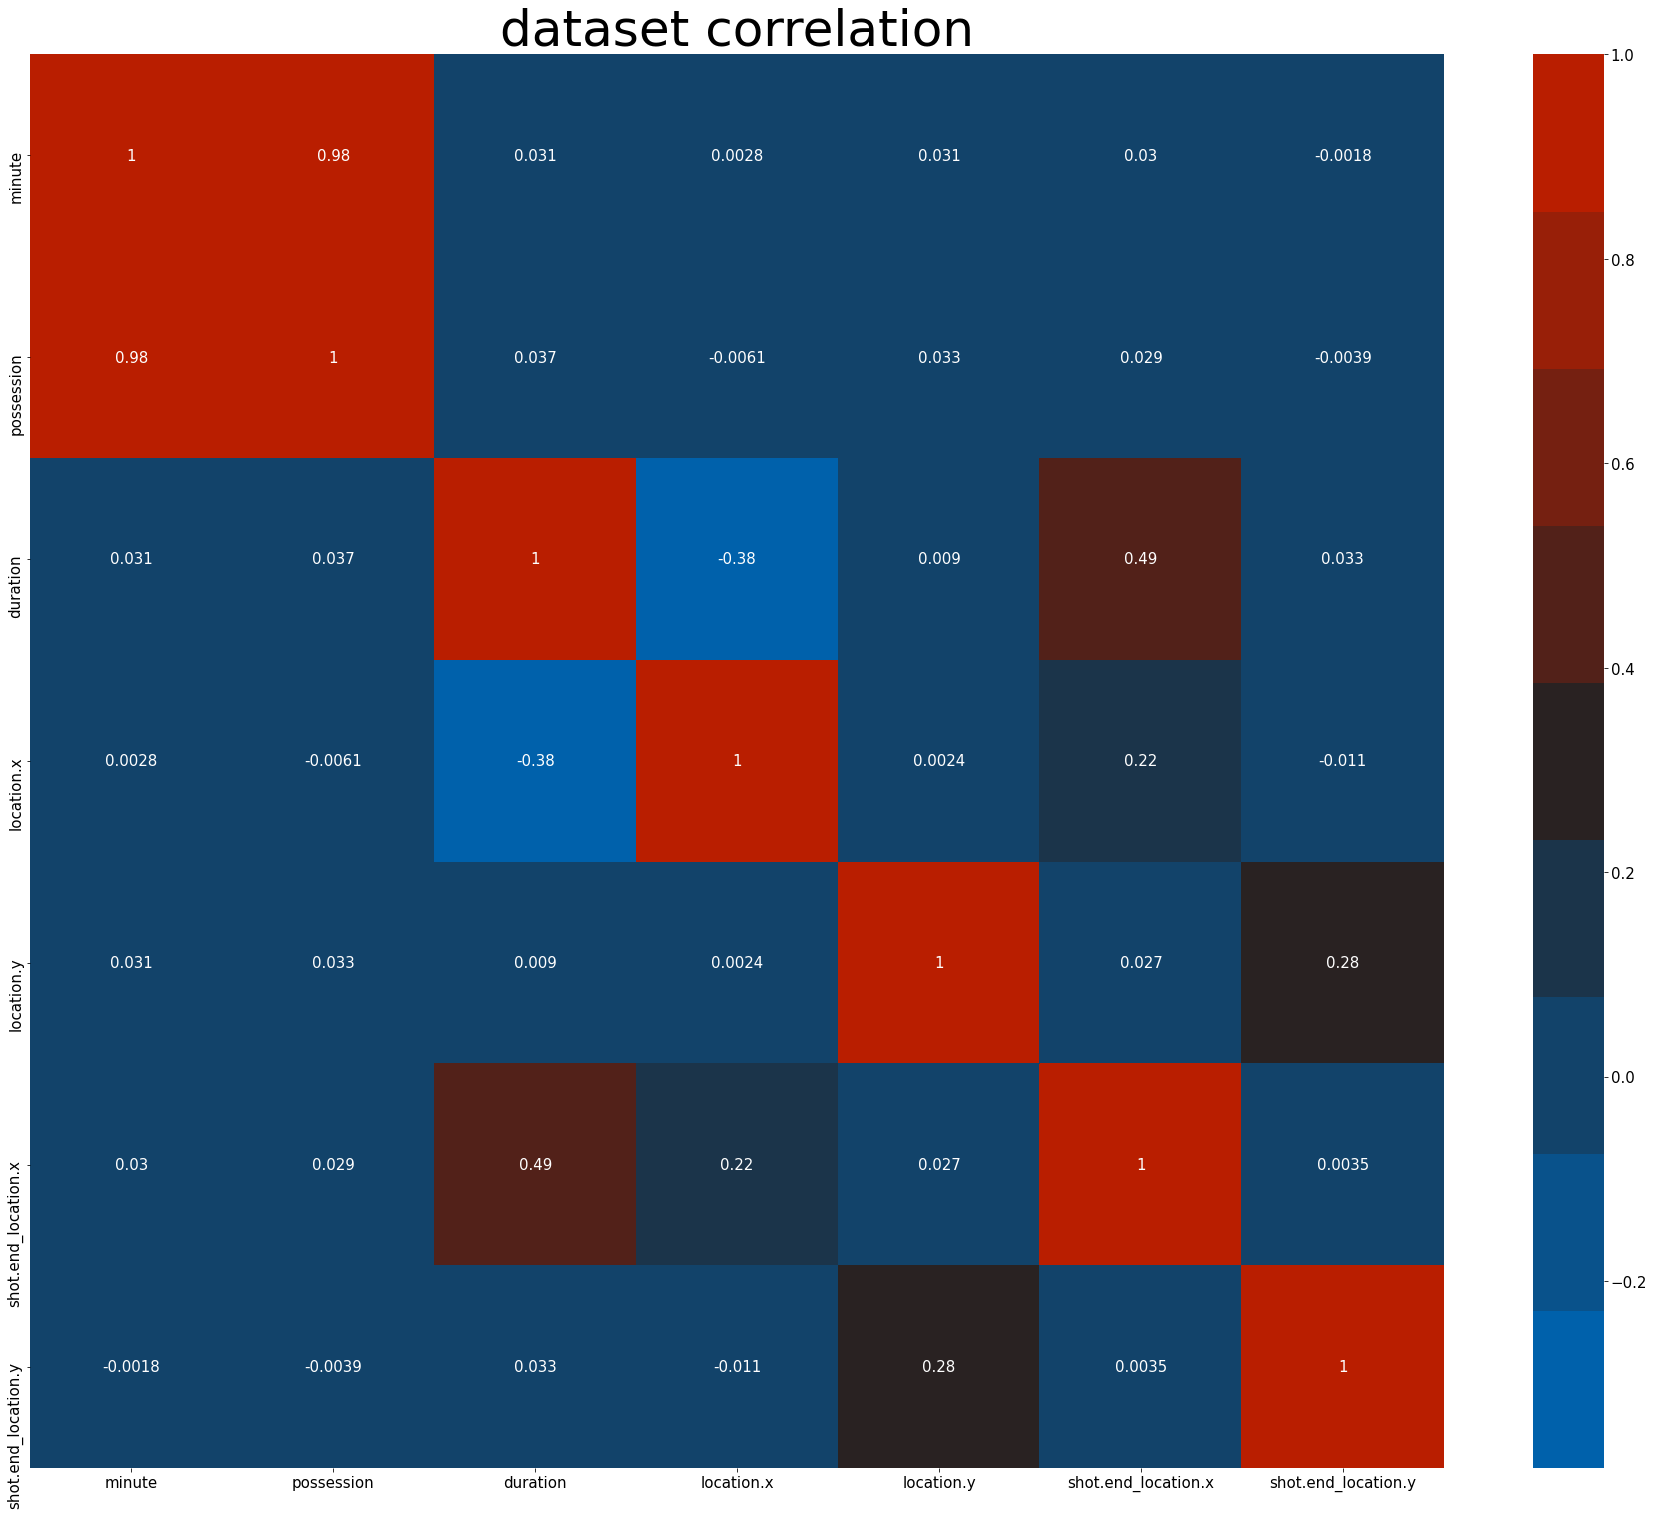

In [72]:
f, ax = plt.subplots(figsize=(32, 26))
corr = shots_mod_2.drop(['id'], axis=1).corr()
matplotlib.rcParams.update({'font.size': 15})
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 15, s=105, l=40, n=9, center="dark"), square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=50);

In [73]:
#in this filter step i was preparing the data for the testing model 
shots_test_model = shots_mod_2.filter(['id',
'minute',
'possession',
'duration',
'under_pressure',
'type.name',
'possession_team.name',
'play_pattern.name',
'team.name',
'position.name',
'shot.one_on_one',
'shot.aerial_won',
'shot.technique.name',
'shot.outcome.name',
'shot.type.name',
'shot.body_part.name',
'shot.open_goal',
'shot.first_time',
'shot.redirect',
'shot.deflected',
'shot.saved_to_post',
'location.x',
'location.y',
'shot.end_location.x',
'shot.end_location.y'],axis=1)
shots_test_model.tail()

,id,minute,possession,duration,under_pressure,type.name,possession_team.name,play_pattern.name,team.name,position.name,...,shot.body_part.name,shot.open_goal,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,shot.end_location.x,shot.end_location.y
2811,a42b9ce2-f07e-4573-9812-f2bb0d22679d,77,155,1.457700,False,Shot,Birmingham City WFC,From Goal Kick,Birmingham City WFC,Right Center Forward,...,Right Foot,False,False,False,False,False,94.1,47.2,118.6,37.6
2812,06dc59cd-bc9e-4ade-8c39-06d141532b31,78,160,0.462900,False,Shot,Birmingham City WFC,From Throw In,Birmingham City WFC,Left Midfield,...,Left Foot,False,False,False,False,False,107.7,49.6,113.1,44.0
2813,66c83037-2341-44c5-8537-18739d1222a0,79,164,1.614835,True,Shot,Yeovil Town LFC,From Throw In,Yeovil Town LFC,Right Center Forward,...,Right Foot,False,True,False,False,False,104.0,51.6,117.9,42.8
2814,8a59f800-19ab-4dc4-b0f1-4fbba16dad54,80,183,2.533402,True,Shot,Yeovil Town LFC,Regular Play,Yeovil Town LFC,Right Center Forward,...,Right Foot,False,True,False,False,False,105.1,59.6,120.0,34.0
2815,61778764-2502-42cf-b714-b0ab3429874a,84,188,0.864600,False,Shot,Birmingham City WFC,From Counter,Birmingham City WFC,Right Midfield,...,Left Foot,False,False,False,False,False,105.7,27.8,118.7,36.3


In [74]:
#I decided to replace every false and every true in the st into 0,1 while i am doing this i found that some is booline so 
#i named it into  H and then i applied the replacement 
shots_test_model.replace('False', 0, regex=True , inplace=True)
shots_test_model.replace('True', 1, regex=True , inplace=True)
H = list(shots_test_model['under_pressure'].value_counts().keys())[1]
shots_test_model.replace(H, 1, regex=True , inplace=True)
shots_test_model.tail()

,id,minute,possession,duration,under_pressure,type.name,possession_team.name,play_pattern.name,team.name,position.name,...,shot.body_part.name,shot.open_goal,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,shot.end_location.x,shot.end_location.y
2811,a42b9ce2-f07e-4573-9812-f2bb0d22679d,77,155,1.457700,0,Shot,Birmingham City WFC,From Goal Kick,Birmingham City WFC,Right Center Forward,...,Right Foot,0,0,0,0,0,94.1,47.2,118.6,37.6
2812,06dc59cd-bc9e-4ade-8c39-06d141532b31,78,160,0.462900,0,Shot,Birmingham City WFC,From Throw In,Birmingham City WFC,Left Midfield,...,Left Foot,0,0,0,0,0,107.7,49.6,113.1,44.0
2813,66c83037-2341-44c5-8537-18739d1222a0,79,164,1.614835,1,Shot,Yeovil Town LFC,From Throw In,Yeovil Town LFC,Right Center Forward,...,Right Foot,0,1,0,0,0,104.0,51.6,117.9,42.8
2814,8a59f800-19ab-4dc4-b0f1-4fbba16dad54,80,183,2.533402,1,Shot,Yeovil Town LFC,Regular Play,Yeovil Town LFC,Right Center Forward,...,Right Foot,0,1,0,0,0,105.1,59.6,120.0,34.0
2815,61778764-2502-42cf-b714-b0ab3429874a,84,188,0.864600,0,Shot,Birmingham City WFC,From Counter,Birmingham City WFC,Right Midfield,...,Left Foot,0,0,0,0,0,105.7,27.8,118.7,36.3


In [75]:
#there is a column called possession_team.name repesents the team that has the ball and team name repersents the team that 
#shot the goal so i decided to know weather the possession helps in making goals or not so i make a new column called 
#possession_shoter if the team name matches the possession_team name i will return to the new column 1 and zero if not
shots_test_model['possession_shoter'] = shots_test_model['possession_team.name'] == shots_test_model['team.name']
#here i am checking the countof each side 
shots_test_model['possession_shoter'].value_counts()

True     2727
False      89
Name: possession_shoter, dtype: int64

In [76]:
#at the first possesssion_shoter column gave me as a result True and False so I decided to return it into 0, 1 as below
shots_test_model.replace(True, 1, regex=True , inplace=True)
shots_test_model.replace(False, 0, regex=True , inplace=True)
shots_test_model.tail()

,id,minute,possession,duration,under_pressure,type.name,possession_team.name,play_pattern.name,team.name,position.name,...,shot.open_goal,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,shot.end_location.x,shot.end_location.y,possession_shoter
2811,a42b9ce2-f07e-4573-9812-f2bb0d22679d,77,155,1.457700,0,Shot,Birmingham City WFC,From Goal Kick,Birmingham City WFC,Right Center Forward,...,0,0,0,0,0,94.1,47.2,118.6,37.6,1.0
2812,06dc59cd-bc9e-4ade-8c39-06d141532b31,78,160,0.462900,0,Shot,Birmingham City WFC,From Throw In,Birmingham City WFC,Left Midfield,...,0,0,0,0,0,107.7,49.6,113.1,44.0,1.0
2813,66c83037-2341-44c5-8537-18739d1222a0,79,164,1.614835,1,Shot,Yeovil Town LFC,From Throw In,Yeovil Town LFC,Right Center Forward,...,0,1,0,0,0,104.0,51.6,117.9,42.8,1.0
2814,8a59f800-19ab-4dc4-b0f1-4fbba16dad54,80,183,2.533402,1,Shot,Yeovil Town LFC,Regular Play,Yeovil Town LFC,Right Center Forward,...,0,1,0,0,0,105.1,59.6,120.0,34.0,1.0
2815,61778764-2502-42cf-b714-b0ab3429874a,84,188,0.864600,0,Shot,Birmingham City WFC,From Counter,Birmingham City WFC,Right Midfield,...,0,0,0,0,0,105.7,27.8,118.7,36.3,1.0


In [77]:
#in this step type.name,possession_team.name,team.name was filtered
shots_test_model2 = shots_test_model.filter(['id',
'minute',
'possession',
'duration',
'under_pressure',
'play_pattern.name',
'shot.one_on_one',
'shot.aerial_won',
'shot.technique.name',
'shot.outcome.name',
'shot.type.name',
'shot.body_part.name',
'shot.open_goal',
'shot.first_time',
'shot.redirect',
'shot.deflected',
'shot.saved_to_post',
'location.x',
'location.y',
'possession_shoter','shot.end_location.x',
'shot.end_location.y'],axis=1)
shots_test_model2.head()

,id,minute,possession,duration,under_pressure,play_pattern.name,shot.one_on_one,shot.aerial_won,shot.technique.name,shot.outcome.name,...,shot.open_goal,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,possession_shoter,shot.end_location.x,shot.end_location.y
0,b20d5df4-6c96-4801-bd59-2ac6ca90aa5b,1,4,0.818259,0,Regular Play,0,0,Normal,Saved,...,0,0,0,0,0,103.0,57.0,1.0,119.0,43.6
1,eb59c3f1-e28b-4f57-9fe8-0aae82c5ecf6,4,15,0.561653,0,Regular Play,0,0,Normal,Blocked,...,0,0,0,0,0,110.0,49.0,1.0,113.0,46.0
2,c39ca2dd-e11b-48a9-b350-84e7fb64c751,5,17,1.348743,1,From Throw In,0,0,Normal,Off T,...,0,0,0,0,0,106.0,53.0,1.0,119.0,34.6
3,d27733e6-4a00-425b-b223-a116ea4a1576,18,42,0.669093,0,From Corner,0,0,Normal,Blocked,...,0,0,0,0,0,107.0,54.0,1.0,112.0,52.0
4,e5f946f8-2da2-4d04-a76a-e53b7291f410,18,42,1.399145,0,From Corner,0,0,Normal,Saved,...,0,0,0,0,0,113.0,38.0,1.0,119.0,42.4


In [78]:
#in this step i decided to focus on shot.outcome.name column and change its name to goal_outcome
shots_test_model2 = shots_test_model2.rename(columns = {'shot.outcome.name': 'goal_outcome'}, inplace = False)
#then decided to creat a dummy variable represents the goal with 1 and any other value in the column is zero
shots_test_model2['intercept'] = 1
shots_test_model2['goal_outcome2'] = pd.get_dummies(shots_test_model2['goal_outcome'])['Goal']
#here trying to make sure the count of goals match 310 
shots_test_model2['goal_outcome2'].value_counts()
#i felt no need for intercept so i delected it 
del shots_test_model2['intercept']

In [79]:
#there was no need for the original clumn so its now deleted
del shots_test_model2['goal_outcome']

In [80]:
#to make sure evrey thing is fine
shots_test_model2.head()


,id,minute,possession,duration,under_pressure,play_pattern.name,shot.one_on_one,shot.aerial_won,shot.technique.name,shot.type.name,...,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,possession_shoter,shot.end_location.x,shot.end_location.y,goal_outcome2
0,b20d5df4-6c96-4801-bd59-2ac6ca90aa5b,1,4,0.818259,0,Regular Play,0,0,Normal,Open Play,...,0,0,0,0,103.0,57.0,1.0,119.0,43.6,0
1,eb59c3f1-e28b-4f57-9fe8-0aae82c5ecf6,4,15,0.561653,0,Regular Play,0,0,Normal,Open Play,...,0,0,0,0,110.0,49.0,1.0,113.0,46.0,0
2,c39ca2dd-e11b-48a9-b350-84e7fb64c751,5,17,1.348743,1,From Throw In,0,0,Normal,Open Play,...,0,0,0,0,106.0,53.0,1.0,119.0,34.6,0
3,d27733e6-4a00-425b-b223-a116ea4a1576,18,42,0.669093,0,From Corner,0,0,Normal,Open Play,...,0,0,0,0,107.0,54.0,1.0,112.0,52.0,0
4,e5f946f8-2da2-4d04-a76a-e53b7291f410,18,42,1.399145,0,From Corner,0,0,Normal,Open Play,...,0,0,0,0,113.0,38.0,1.0,119.0,42.4,0


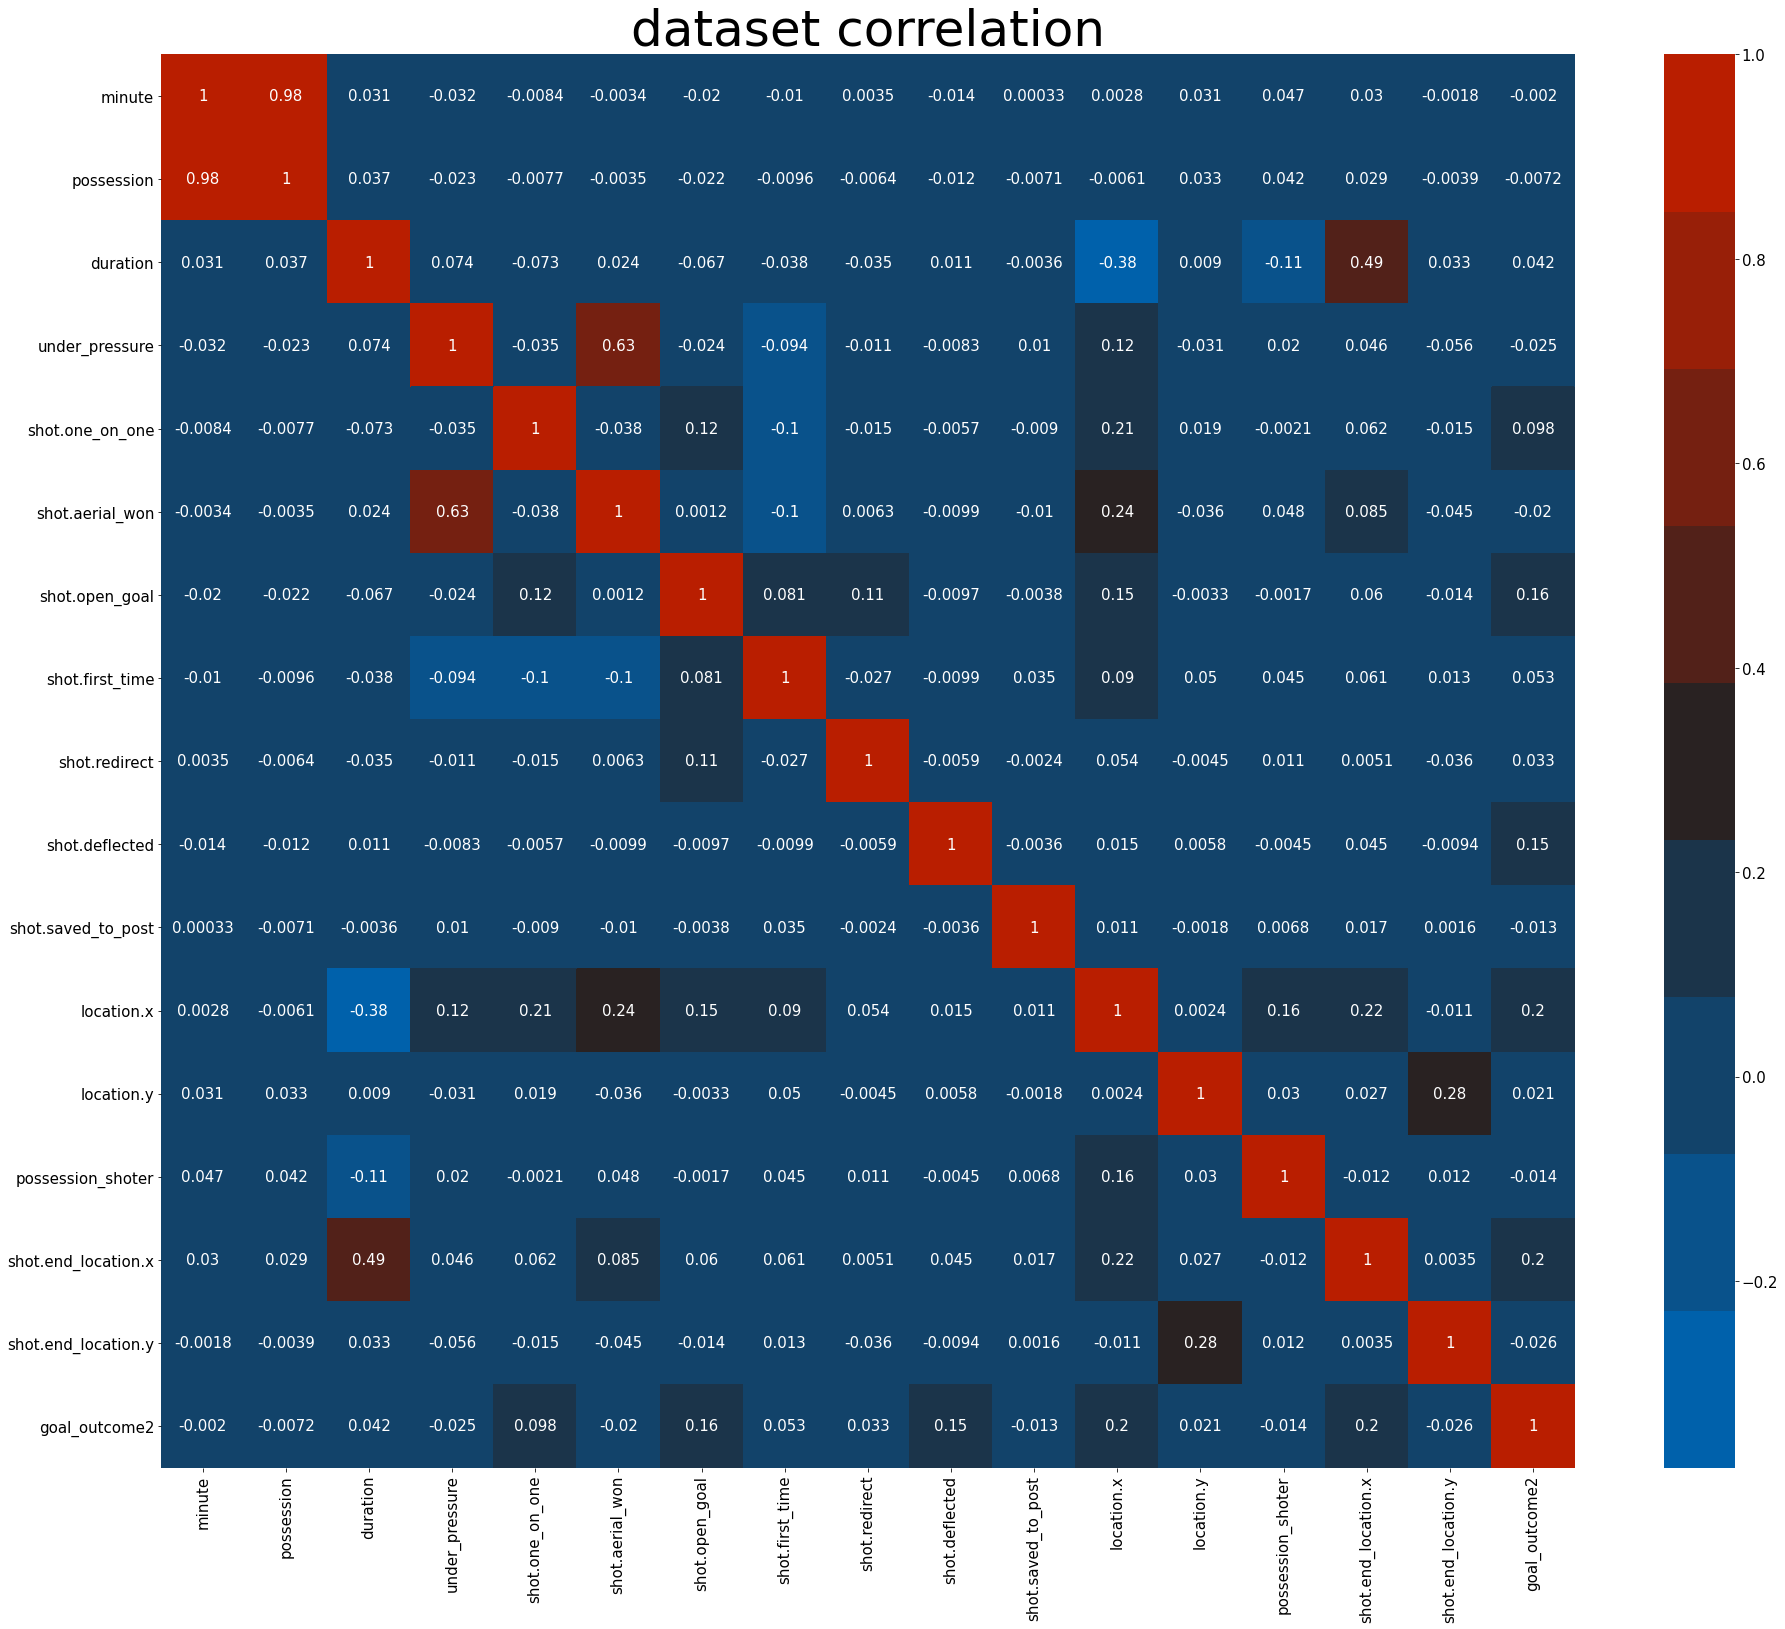

In [81]:
#still exploring the date using same visual and new colors starts to apper 
f, ax = plt.subplots(figsize=(32, 26))
corr = shots_test_model2.corr()
matplotlib.rcParams.update({'font.size': 15})
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 15, s=105, l=40, n=9, center="dark"), square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=50);

In [82]:
#this is the first part to be preparted for modeling by removing the usless columns 
test_shots = shots_test_model2.filter([
'minute',
'possession',
'duration',
'under_pressure',
'shot.one_on_one',
'shot.aerial_won',
'shot.open_goal',
'shot.first_time',
'shot.redirect',
'shot.deflected',
'shot.saved_to_post',
'location.x',
'location.y',
'possession_shoter','goal_outcome2','shot.end_location.x',
'shot.end_location.y'],axis=1)
test_shots.tail()

,minute,possession,duration,under_pressure,shot.one_on_one,shot.aerial_won,shot.open_goal,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,possession_shoter,goal_outcome2,shot.end_location.x,shot.end_location.y
2811,77,155,1.457700,0,0,0,0,0,0,0,0,94.1,47.2,1.0,0,118.6,37.6
2812,78,160,0.462900,0,0,0,0,0,0,0,0,107.7,49.6,1.0,0,113.1,44.0
2813,79,164,1.614835,1,0,0,0,1,0,0,0,104.0,51.6,1.0,0,117.9,42.8
2814,80,183,2.533402,1,0,0,0,1,0,0,0,105.1,59.6,1.0,0,120.0,34.0
2815,84,188,0.864600,0,0,0,0,0,0,0,0,105.7,27.8,1.0,0,118.7,36.3


# Data Cleaning for second data frame 


In [83]:
#Reading the second df 
freeze_frame.head()

,id,location.x,location.y,teammate,player.id,player.name,position.id,position.name
0,b20d5df4-6c96-4801-bd59-2ac6ca90aa5b,102,35,True,15547,Melissa Lawley,24,Left Center Forward
1,b20d5df4-6c96-4801-bd59-2ac6ca90aa5b,101,43,True,15555,Lauren Hemp,22,Right Center Forward
2,b20d5df4-6c96-4801-bd59-2ac6ca90aa5b,118,43,False,4640,Rut Hedvig Lindahl,1,Goalkeeper
3,b20d5df4-6c96-4801-bd59-2ac6ca90aa5b,109,52,False,4633,Magdalena Ericsson,5,Left Center Back
4,b20d5df4-6c96-4801-bd59-2ac6ca90aa5b,100,51,False,15549,Sophie Ingle,9,Right Defensive Midfield


In [84]:
#teammate column valuse is a bool, i want to change it into 0,1
freeze_frame.replace(False, 0, regex=True , inplace=True)
freeze_frame.replace(True, 1, regex=True , inplace=True)
freeze_frame.tail()

,id,location.x,location.y,teammate,player.id,player.name,position.id,position.name
34471,61778764-2502-42cf-b714-b0ab3429874a,105,25,0.0,10195,Rachel Mclauchlan,12,Right Midfield
34472,61778764-2502-42cf-b714-b0ab3429874a,96,22,0.0,15707,Georgia Evans,15,Left Center Midfield
34473,61778764-2502-42cf-b714-b0ab3429874a,82,29,0.0,15705,Emily Donovan,16,Left Midfield
34474,61778764-2502-42cf-b714-b0ab3429874a,108,17,1.0,10180,Ellen White,24,Left Center Forward
34475,61778764-2502-42cf-b714-b0ab3429874a,102,33,1.0,15562,Lucy Staniforth,22,Right Center Forward


In [85]:
#my plan is to aggregate the 1 vaule for the same id so i can know how many team mate was around the goal shoter
freez_test_model2=freeze_frame.groupby('id').sum()[['teammate']]
freez_test_model2

,teammate
id,
00063980-fd46-4b06-8eff-58916206ae80,4.0
0024316a-8bbe-4b06-92a4-2146ea3a25e8,7.0
002e8652-613e-46b2-afc3-a81c63eca527,3.0
003b0566-1e1d-4acc-9808-8b9b88bab0fa,3.0
0047b26b-5f8d-4012-9650-6234463fd4f1,3.0
...,...
ffb388f6-0fbe-424d-bad0-966fbd9d4630,0.0
ffbe8b7e-9199-4e48-bada-51cc7317efcb,2.0
ffe447e0-3708-42d9-8a7e-00ef356fc471,9.0


In [86]:
#then I have to know the total of the players 
freeze_frame.groupby('id').count()
freez_test_model2=freeze_frame.groupby('id').sum()[['teammate']]
freez_test_model2

,teammate
id,
00063980-fd46-4b06-8eff-58916206ae80,4.0
0024316a-8bbe-4b06-92a4-2146ea3a25e8,7.0
002e8652-613e-46b2-afc3-a81c63eca527,3.0
003b0566-1e1d-4acc-9808-8b9b88bab0fa,3.0
0047b26b-5f8d-4012-9650-6234463fd4f1,3.0
...,...
ffb388f6-0fbe-424d-bad0-966fbd9d4630,0.0
ffbe8b7e-9199-4e48-bada-51cc7317efcb,2.0
ffe447e0-3708-42d9-8a7e-00ef356fc471,9.0


In [87]:
#by substracting the team mates from the total of the player i can know the total of the other players around the goal shoter
freez_test_model=freeze_frame.groupby('id').count()
newfreez_test = pd.merge(freez_test_model2, freez_test_model['location.x'], how='left', on='id')
newfreez_test.columns = ['teammate', 'all']
newfreez_test['other_team'] = newfreez_test['all'] - newfreez_test['teammate']
newfreez_test.reset_index(inplace=True)
newfreez_test.drop('all', axis=1, inplace=True)
newfreez_test.head()

,id,teammate,other_team
0,00063980-fd46-4b06-8eff-58916206ae80,4.0,0.0
1,0024316a-8bbe-4b06-92a4-2146ea3a25e8,7.0,11.0
2,002e8652-613e-46b2-afc3-a81c63eca527,3.0,5.0
3,003b0566-1e1d-4acc-9808-8b9b88bab0fa,3.0,8.0
4,0047b26b-5f8d-4012-9650-6234463fd4f1,3.0,8.0


In [88]:
#1 data set merged 
final_data = pd.merge(shots_test_model2, newfreez_test, how='left', on='id')
c=len(final_data)
print('Total Number of Rows or final Dataset = ',c)

Total Number of Rows or final Dataset =  2816


In [89]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 0 to 2815
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2816 non-null   object 
 1   minute               2816 non-null   int64  
 2   possession           2816 non-null   int64  
 3   duration             2816 non-null   float64
 4   under_pressure       2816 non-null   int64  
 5   play_pattern.name    2816 non-null   object 
 6   shot.one_on_one      2816 non-null   int64  
 7   shot.aerial_won      2816 non-null   int64  
 8   shot.technique.name  2816 non-null   object 
 9   shot.type.name       2816 non-null   object 
 10  shot.body_part.name  2816 non-null   object 
 11  shot.open_goal       2816 non-null   int64  
 12  shot.first_time      2816 non-null   int64  
 13  shot.redirect        2816 non-null   int64  
 14  shot.deflected       2816 non-null   int64  
 15  shot.saved_to_post   2816 non-null   i

In [90]:
#during this step I am creating a new frame set which is the last step of preparing to the model
test_final_data=final_data.filter(['minute',
'possession',
'duration',
'under_pressure',
'shot.one_on_one',
'shot.aerial_won',
'shot.open_goal',
'shot.first_time',
'shot.redirect',
'shot.deflected',
'shot.saved_to_post',
'location.x',
'location.y',
'possession_shoter',
'shot.end_location.x',
'shot.end_location.y',
'goal_outcome2',
'teammate',
'other_team'],axis=1)
test_final_data.tail()

,minute,possession,duration,under_pressure,shot.one_on_one,shot.aerial_won,shot.open_goal,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,possession_shoter,shot.end_location.x,shot.end_location.y,goal_outcome2,teammate,other_team
2811,77,155,1.457700,0,0,0,0,0,0,0,0,94.1,47.2,1.0,118.6,37.6,0,6.0,10.0
2812,78,160,0.462900,0,0,0,0,0,0,0,0,107.7,49.6,1.0,113.1,44.0,0,5.0,9.0
2813,79,164,1.614835,1,0,0,0,1,0,0,0,104.0,51.6,1.0,117.9,42.8,0,2.0,5.0
2814,80,183,2.533402,1,0,0,0,1,0,0,0,105.1,59.6,1.0,120.0,34.0,0,1.0,3.0
2815,84,188,0.864600,0,0,0,0,0,0,0,0,105.7,27.8,1.0,118.7,36.3,0,3.0,8.0


# Data Modeling 

In [91]:
#test_final_data will be representing the model output, the libabry used sklearn
test_final_data=final_data.filter(['minute',
'possession',
'duration',
'under_pressure',
'shot.one_on_one',
'shot.aerial_won',
'shot.open_goal',
'shot.first_time',
'shot.redirect',
'shot.deflected',
'shot.saved_to_post',
'location.x',
'location.y',
'possession_shoter',
'shot.end_location.x',
'shot.end_location.y',
'teammate',
'other_team'],axis=1)
test_labels_data=final_data.filter(['goal_outcome2'],axis=1)
test_final_data=np.nan_to_num(test_final_data)



from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(test_final_data, test_labels_data, test_size=0.2, random_state=4)

from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
tree_clf.score(x_test,y_test)


0.898936170212766

In [92]:
tree_clf.predict(test_final_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [93]:
tree_clf.predict_proba(test_final_data)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# Data Visualization

In [94]:
#I decided to filter the data by the goal_outcome table on the goals only 
vis_set_1=shots_test_model2.loc[shots_test_model2['goal_outcome2'] == 1]
vis_set_1.head()

,id,minute,possession,duration,under_pressure,play_pattern.name,shot.one_on_one,shot.aerial_won,shot.technique.name,shot.type.name,...,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,possession_shoter,shot.end_location.x,shot.end_location.y,goal_outcome2
41,cf7df504-fea5-4aab-9ae0-ef1b97725254,70,175,3.01293,0,From Throw In,0,0,Lob,Open Play,...,0,0,0,0,87.0,35.0,1.0,119.0,38.7,1
45,f0b5ba5b-141b-443a-8343-ac89dd2cacc8,4,11,1.31710,0,Regular Play,1,0,Lob,Open Play,...,0,0,0,0,111.0,35.0,1.0,120.0,39.9,1
48,dc608d99-7ec8-45b8-8dbb-a927954f8ad6,10,30,1.16430,0,Regular Play,0,0,Normal,Open Play,...,0,0,0,0,104.0,54.0,1.0,120.0,37.0,1
63,7b2f18d5-c8db-487b-bd47-080c55cb72b6,58,134,0.62710,0,Other,0,0,Normal,Penalty,...,0,0,0,0,108.0,40.0,1.0,119.0,37.0,1
64,0fd10336-422b-45d3-989b-be77511834d5,60,136,1.08170,0,Regular Play,0,0,Normal,Open Play,...,0,0,0,0,111.0,44.0,1.0,119.0,37.0,1


In [95]:
for i in range(len(list(vis_set_1))):
    print(i, list(vis_set_1)[i])

0 id
1 minute
2 possession
3 duration
4 under_pressure
5 play_pattern.name
6 shot.one_on_one
7 shot.aerial_won
8 shot.technique.name
9 shot.type.name
10 shot.body_part.name
11 shot.open_goal
12 shot.first_time
13 shot.redirect
14 shot.deflected
15 shot.saved_to_post
16 location.x
17 location.y
18 possession_shoter
19 shot.end_location.x
20 shot.end_location.y
21 goal_outcome2


In [96]:
#creating the first visual using the play pattern column
play_pattern = dict(vis_set_1['play_pattern.name'].value_counts())

In [97]:
play_pattern

{'Regular Play': 101,
 'From Throw In': 54,
 'From Free Kick': 50,
 'From Corner': 39,
 'From Counter': 23,
 'Other': 19,
 'From Goal Kick': 15,
 'From Kick Off': 7,
 'From Keeper': 2}

In [98]:
play_pattern.pop('Other')

19

In [99]:
play_pattern

{'Regular Play': 101,
 'From Throw In': 54,
 'From Free Kick': 50,
 'From Corner': 39,
 'From Counter': 23,
 'From Goal Kick': 15,
 'From Kick Off': 7,
 'From Keeper': 2}

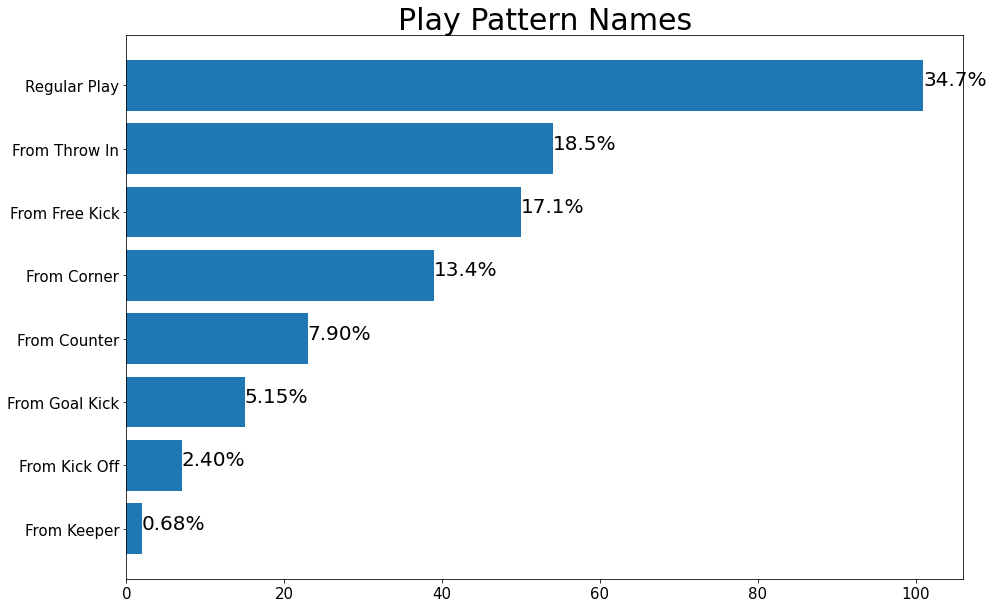

In [100]:
#visualizing the names of the play pattern and its precentage when goal outcome is goal 
f, ax = plt.subplots(figsize=(15,10))
keys = list(play_pattern.keys())
values = list(play_pattern.values())
keys.reverse()
values.reverse()
total = sum(values)
percentage = values / total
for i, v in enumerate(percentage):
    ax.text(values[i], i, str(v * 100)[:4] + "%", fontsize=20)
plt.barh(keys, values)
plt.title("Play Pattern Names", fontsize=30)
plt.savefig("Charts/{}.png".format("Play Pattern Names"), bbox_inches="tight")

#plt.xticks(rotation=90);

In [101]:
#setting colour for all the columns that will be needed to be visualed in a pie chart
set_colors = ("#9c254d","#7890cd", "#FFFFFF")

In [102]:
#as there are many columns to be visualed in a pie formate so i decided to make it in a loop so it will be visualed together
import os
try:
    os.mkdir("Charts")
except:
    pass

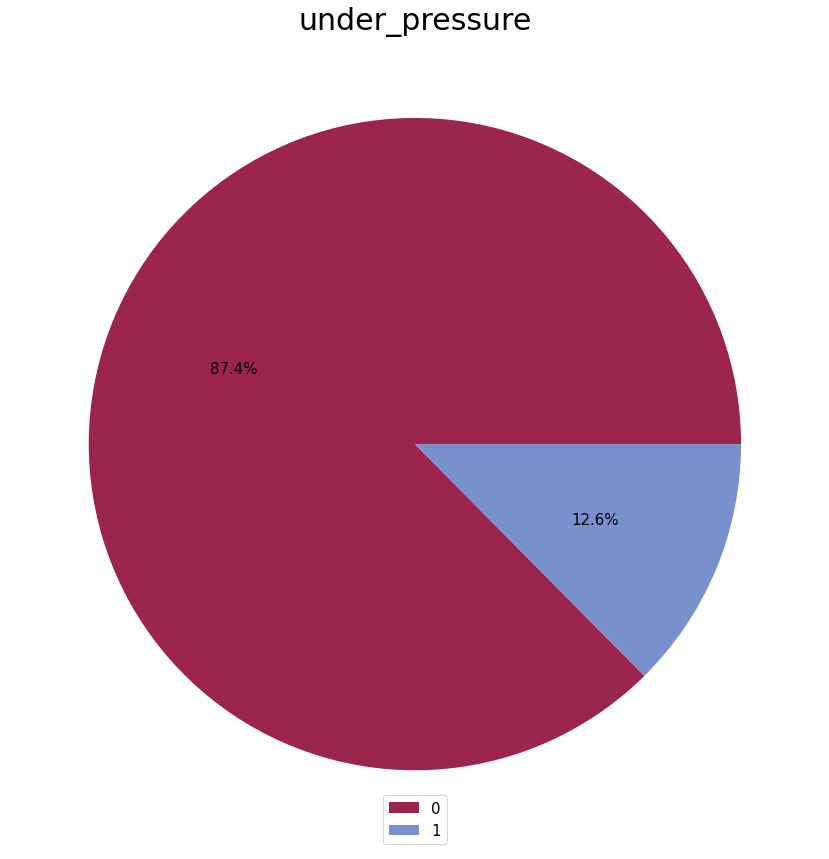

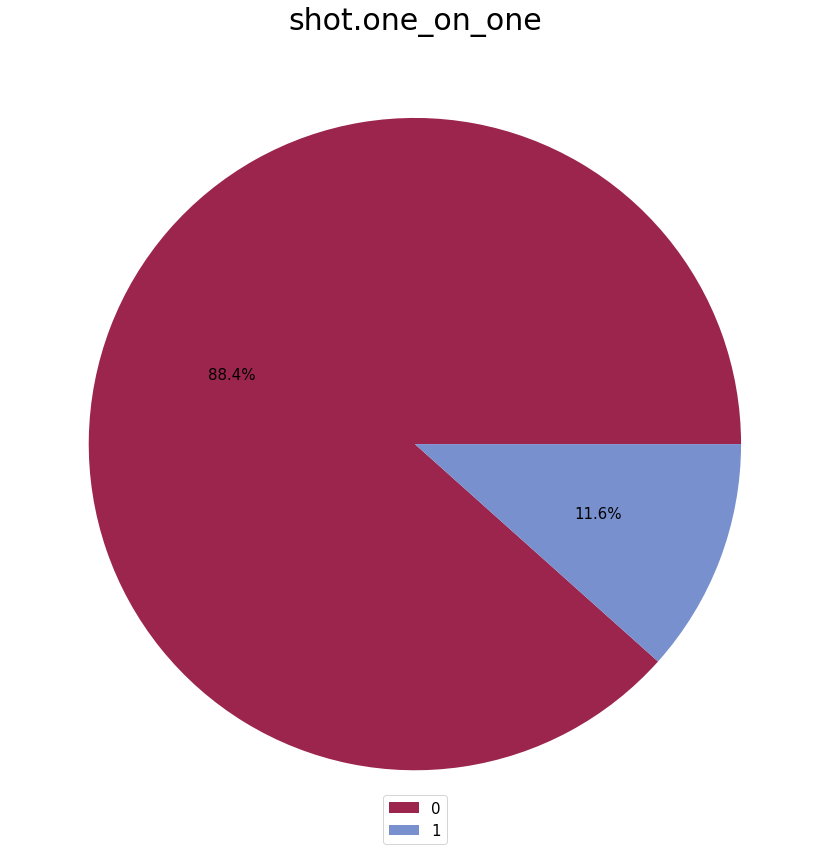

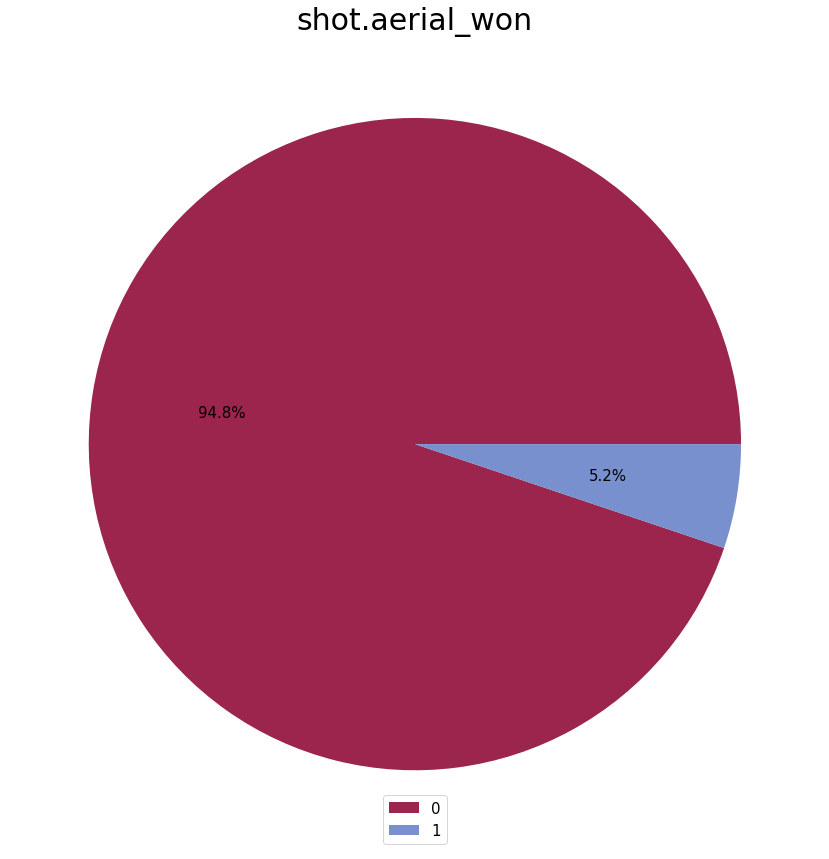

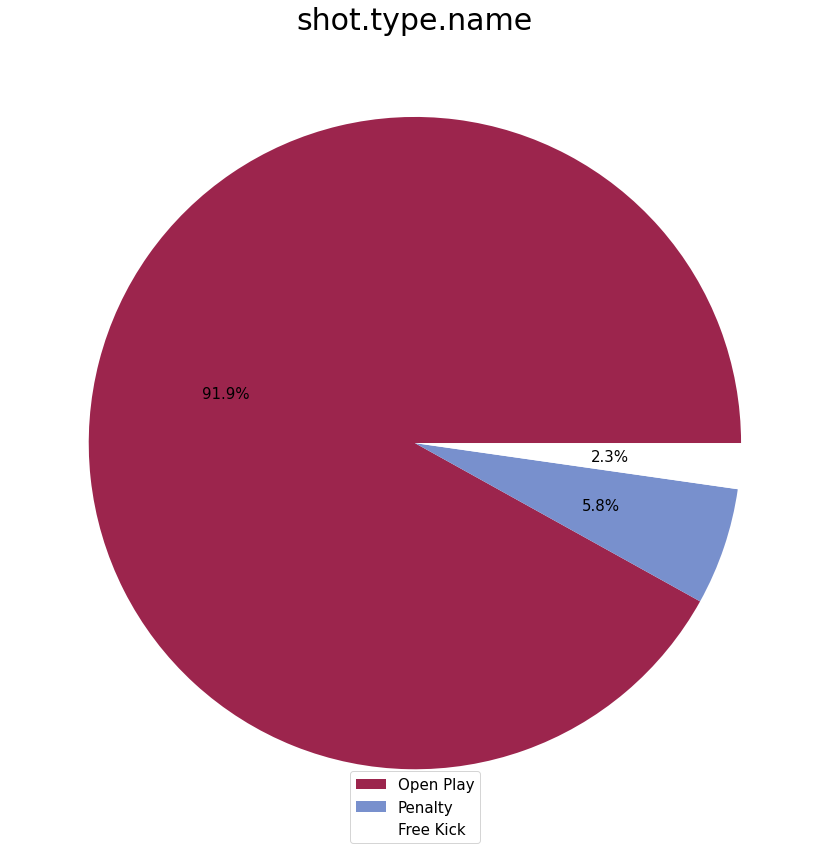

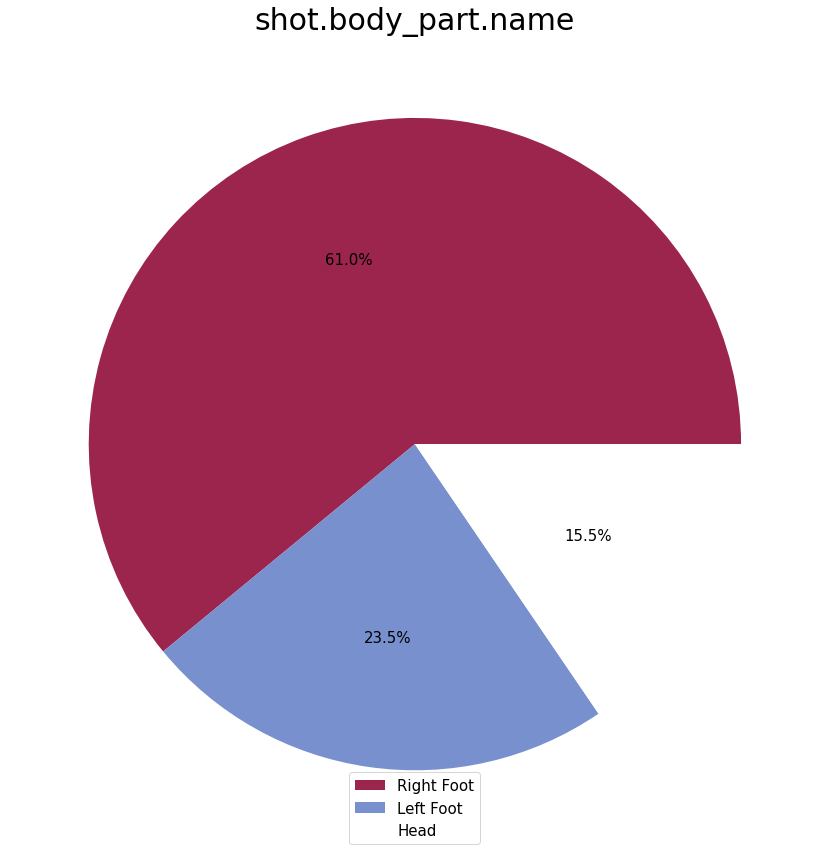

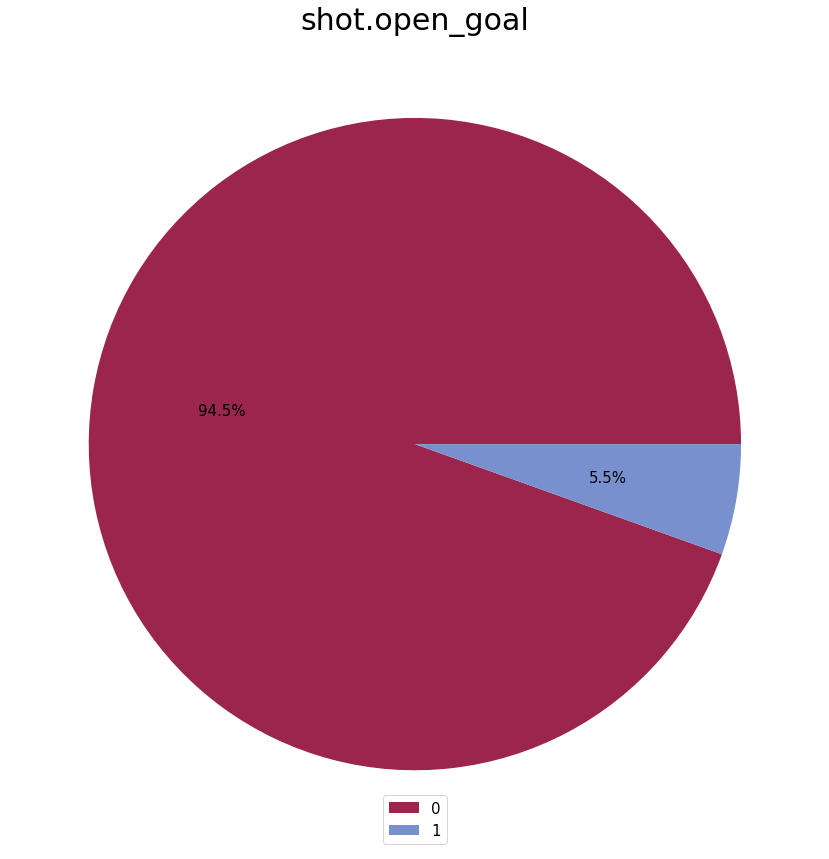

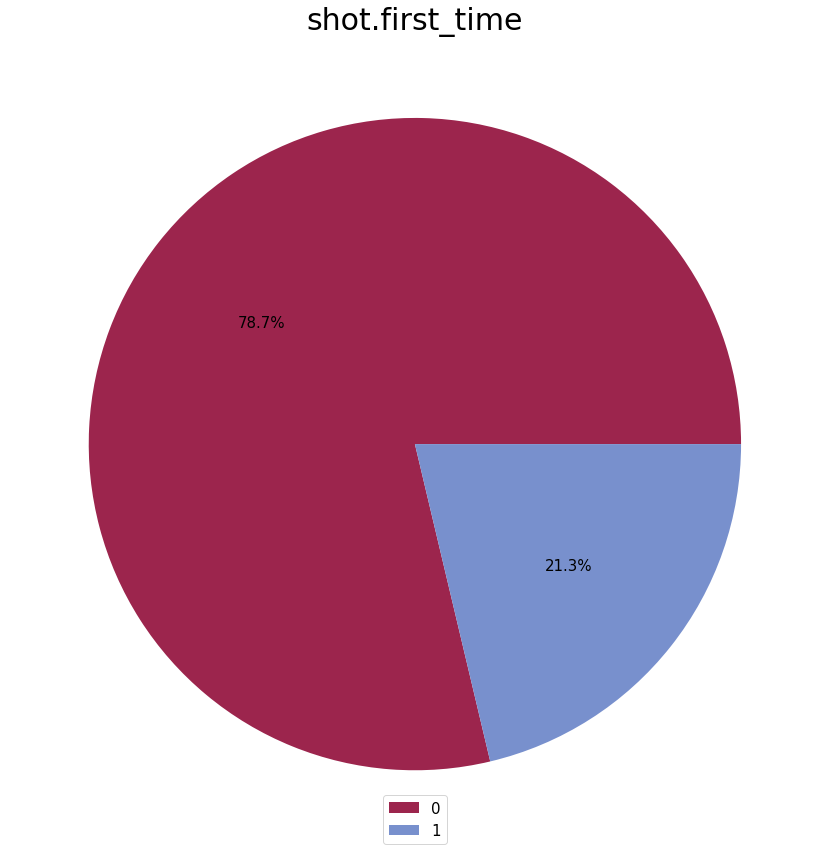

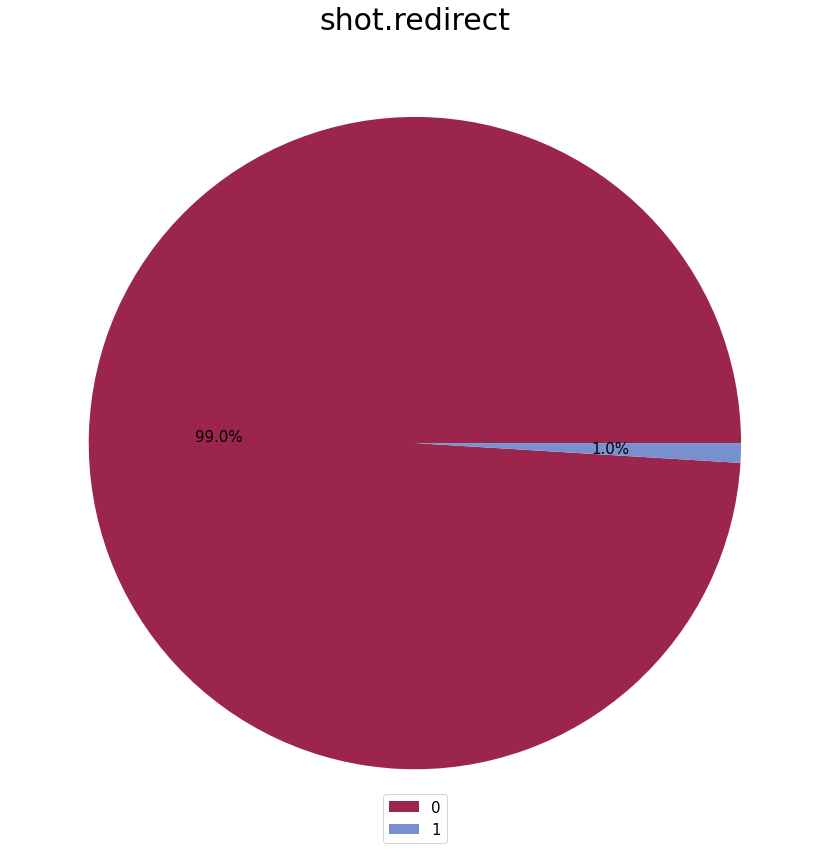

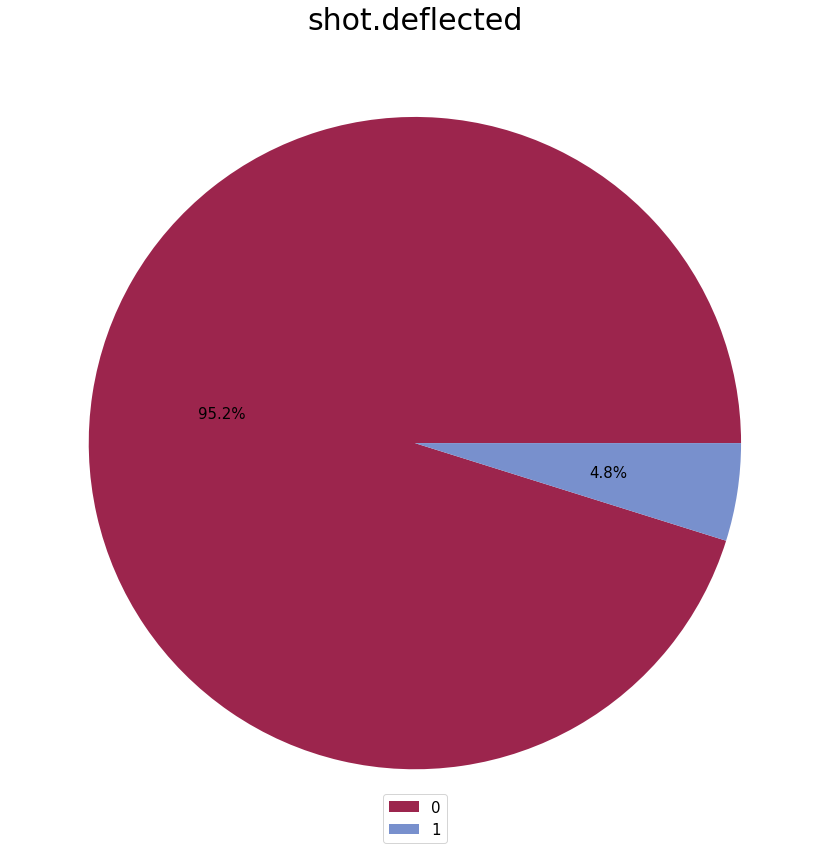

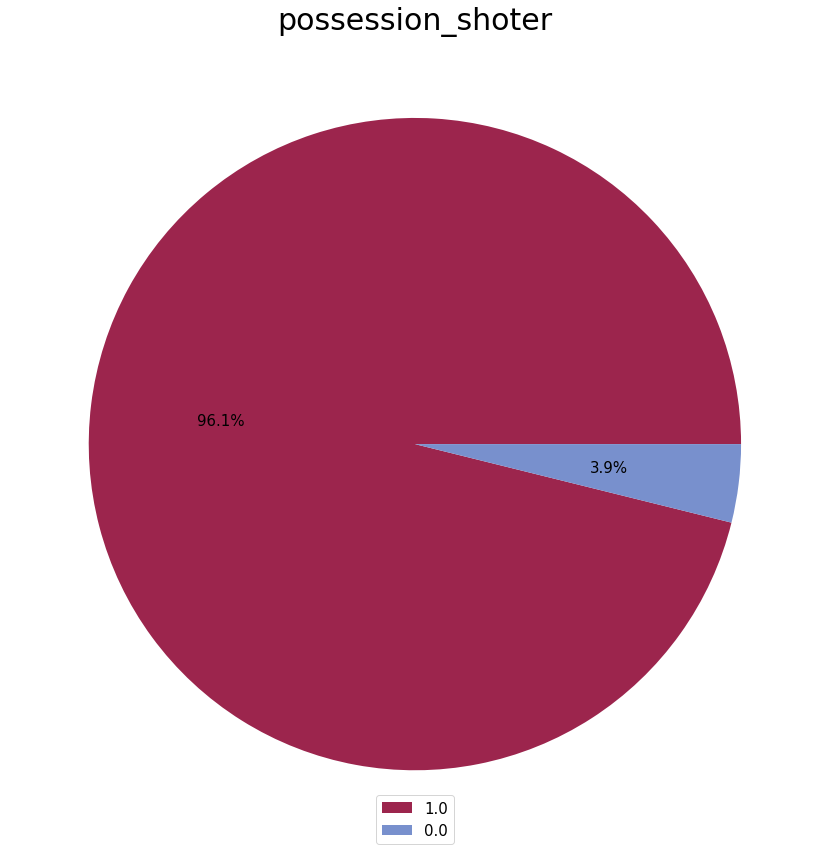

In [109]:
# visualising the pie
for item in list(vis_set_1):
    Dict = dict(vis_set_1[item].value_counts())
    if len(list(Dict.keys())) > 3 or len(list(Dict.keys())) == 1:
        continue
    keys = Dict.keys()
    values = Dict.values()
    f, ax = plt.subplots(figsize=(15,15))
    plt.pie(values, labels=["" for k in keys], autopct="%.1f%%", colors=set_colors)
    plt.legend(loc='lower center', labels=keys)
    plt.title(item, fontsize=30, color="Black")
    #plt.savefig("Charts/{}.png".format(item), bbox_inches="tight")
    plt.show()

In [104]:
#defining the shot_type as a prepration for the visualization 

shot_type= dict(vis_set_1['shot.type.name'].value_counts())

Text(0.5, 1.0, 'Shots Types')

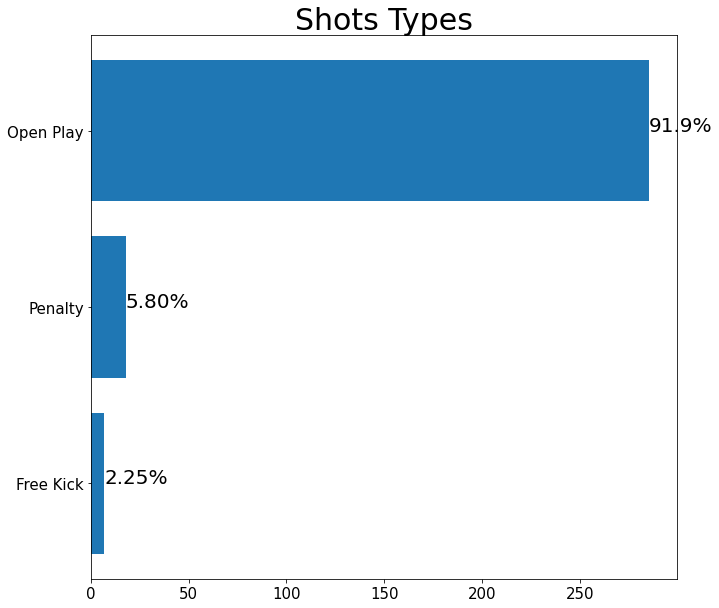

In [105]:
#visualization step 
f, ax = plt.subplots(figsize=(10.5,10))
keys = list(shot_type.keys())
values = list(shot_type.values())
keys.reverse()
values.reverse()
total = sum(values)
percentage = values / total
for i, v in enumerate(percentage):
    ax.text(values[i], i, str(v * 100)[:4] + "%", fontsize=20)
plt.barh(keys, values)
plt.savefig("Charts/{}.png".format("Shot Types"), bbox_inches="tight")
plt.title("Shots Types", fontsize=30) #9c254d

In [106]:
test_final_data=final_data.filter(['minute',
'possession',
'duration',
'under_pressure',
'shot.one_on_one',
'shot.aerial_won',
'shot.open_goal',
'shot.first_time',
'shot.redirect',
'shot.deflected',
'shot.saved_to_post',
'location.x',
'location.y',
'possession_shoter',
'shot.end_location.x',
'shot.end_location.y',
'goal_outcome2',
'teammate',
'other_team'],axis=1)
test_final_data.tail()

,minute,possession,duration,under_pressure,shot.one_on_one,shot.aerial_won,shot.open_goal,shot.first_time,shot.redirect,shot.deflected,shot.saved_to_post,location.x,location.y,possession_shoter,shot.end_location.x,shot.end_location.y,goal_outcome2,teammate,other_team
2811,77,155,1.457700,0,0,0,0,0,0,0,0,94.1,47.2,1.0,118.6,37.6,0,6.0,10.0
2812,78,160,0.462900,0,0,0,0,0,0,0,0,107.7,49.6,1.0,113.1,44.0,0,5.0,9.0
2813,79,164,1.614835,1,0,0,0,1,0,0,0,104.0,51.6,1.0,117.9,42.8,0,2.0,5.0
2814,80,183,2.533402,1,0,0,0,1,0,0,0,105.1,59.6,1.0,120.0,34.0,0,1.0,3.0
2815,84,188,0.864600,0,0,0,0,0,0,0,0,105.7,27.8,1.0,118.7,36.3,0,3.0,8.0


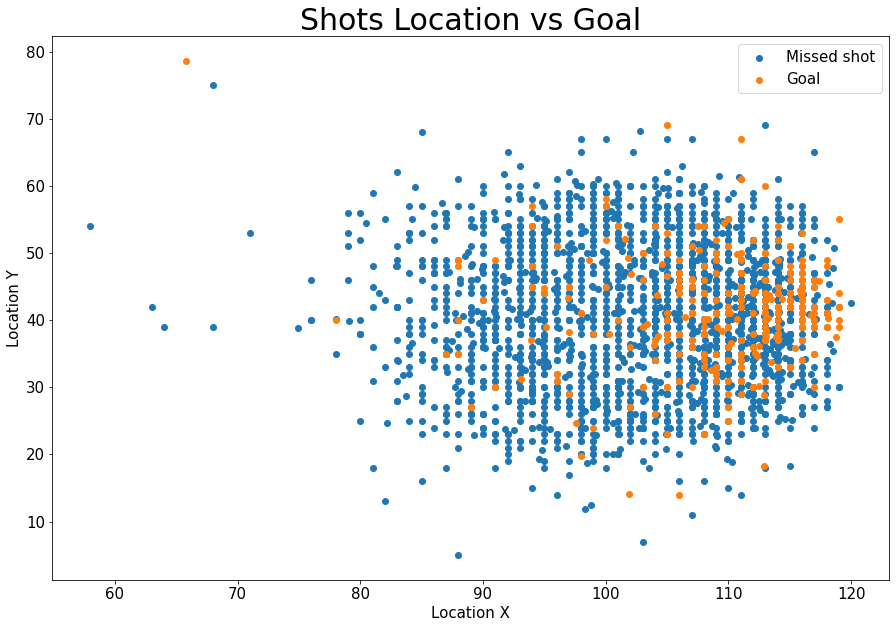

In [107]:
#
f, ax = plt.subplots(figsize=(15,10))
for name, group in test_final_data.groupby('goal_outcome2'):
    plt.scatter(group['location.x'], group['location.y'])
plt.xlabel("Location X")
plt.ylabel("Location Y")
plt.title("Shots Location vs Goal", fontsize = 30)
plt.legend(("Missed shot", "Goal"))
plt.savefig("Charts/Shots Location vs Goal.png", bbox_inches='tight')
plt.show()

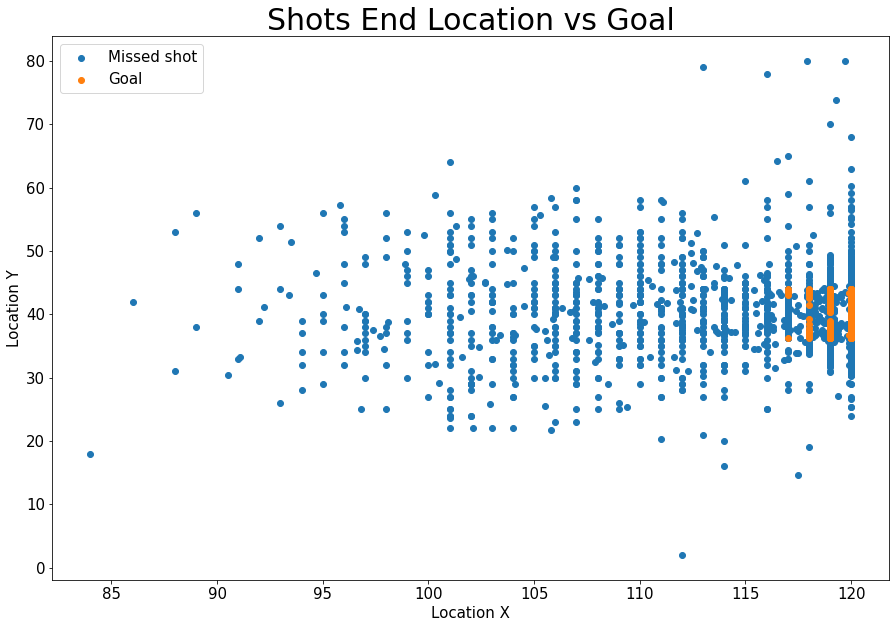

In [108]:
f, ax = plt.subplots(figsize=(15,10))
for name, group in test_final_data.groupby('goal_outcome2'):
    plt.scatter(group['shot.end_location.x'], group['shot.end_location.y'])
plt.xlabel("Location X")
plt.ylabel("Location Y")
plt.title("Shots End Location vs Goal", fontsize = 30)
plt.legend(("Missed shot", "Goal"))
plt.savefig("Charts/Shots End Location vs Goal.png", bbox_inches='tight')
plt.show()

# Conclusions


As shown in the data that the total of goal for this dataset is 310 goal most of then found to be happing in the below            conditions                                                                                                                     
A)91% of the time the shot type will be open play                                                                               
B)61% of the times it will be by the right foot                                                                                 
C)most of the goal shots happend because of teh shot start location between 110 to 120 location 



# Limitaion

Its my first time to use a football dataset, so it took me some time to understand the abbreviation of the columns and the meaning of it on the ground, so it took me some time to understand the abbriviation of the columns and the meaning of it on the ground 

# References  

A) stackoverflow                                                                                                               
B)https://scikit-learn.org/stable/modules/tree.html                                                                             
C)Matplotlip/Seaborn documentations 